# Scatter plot for SMOTE

In [8]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

First, I load the files. 

In [2]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V3/merged_df.csv', sep=',')

merged_df.drop('Unnamed: 0', axis=1, inplace=True)
merged_df.drop('Unnamed: 0.1', axis=1, inplace=True)

Just like in my rf.ipynb the test size is set to 0.4.

In [6]:
train, test = train_test_split(merged_df, test_size=0.4, random_state=123, stratify=merged_df['VVR_group'])

print(train.shape)
print(test.shape)

(66, 127)
(45, 127)


In [7]:
columns_to_drop = [ 'ID', 'sum_12', 'sum_4567', 'sum_456', 'VVR_group', 'Condition'] 

X_train = train.drop(columns_to_drop, axis=1)
y_train = train['VVR_group']

# Print original class distribution
print('Original dataset shape %s' % Counter(y_train))

# Apply SMOTE to the training data with sampling strategy set to 'auto' (default)
sm = SMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print resampled class distribution
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 51, 1: 15})
Resampled dataset shape Counter({1: 51, 0: 51})


In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_res)

In [10]:
# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components (2 for 2D scatter plot)
X_pca = pca.fit_transform(X_scaled)

In [11]:
print(X_pca.shape)


(102, 2)


In [12]:
# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

display(pca_df)

,PC1,PC2
0,-0.462868,-0.731781
1,2.670764,-3.566587
2,2.936223,-4.694103
3,2.635174,-2.664141
4,2.615407,1.123570
...,...,...
97,3.231614,0.631698
98,2.560697,-3.455508
99,0.888169,-0.850015
100,-7.552228,10.856535


In [14]:
# Concatenate the principal components with the target variable
final_df = pd.concat([pca_df, y_train_res], axis=1)

display(final_df)

,PC1,PC2,VVR_group
0,-0.462868,-0.731781,1
1,2.670764,-3.566587,1
2,2.936223,-4.694103,0
3,2.635174,-2.664141,0
4,2.615407,1.123570,0
...,...,...,...
97,3.231614,0.631698,1
98,2.560697,-3.455508,1
99,0.888169,-0.850015,1
100,-7.552228,10.856535,1


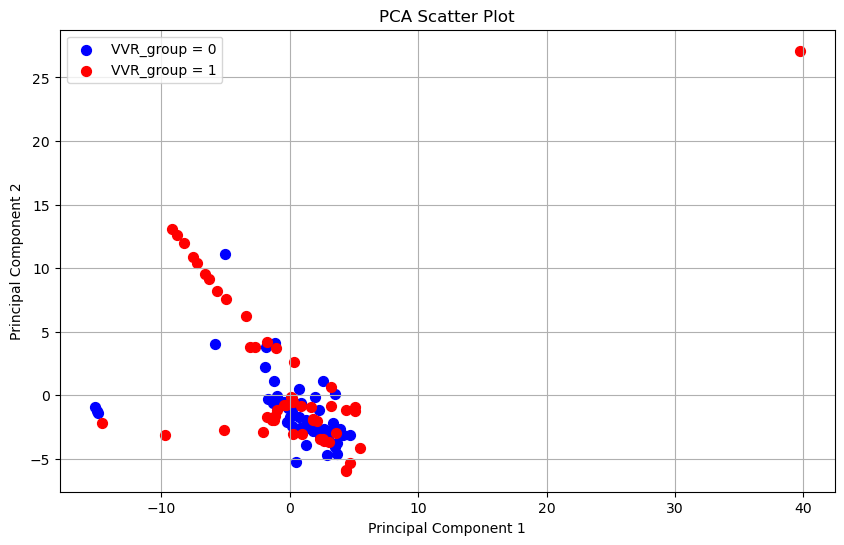

In [15]:
# Plot the data
plt.figure(figsize=(10, 6))
targets = [0, 1]  # VVR_group labels
colors = ['b', 'r']  # Blue for VVR_group = 0, Red for VVR_group = 1
for target, color in zip(targets, colors):
    indices_to_keep = final_df['VVR_group'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'],
                final_df.loc[indices_to_keep, 'PC2'],
                c=color,
                s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(['VVR_group = 0', 'VVR_group = 1'])
plt.grid(True)
plt.show()